<a href="https://colab.research.google.com/github/jamal221/Machine_Learning_Project/blob/main/KNNHeart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/CSV_Files/")

In [5]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

خانم هایی که کلسترول بالای 150 و مریض نیستند

In [25]:
data2=data[data['sex']==0]

In [30]:
data2=data2[data2['chol']>150]

age         94
sex         94
cp          94
trestbps    94
chol        94
fbs         94
restecg     94
thalach     94
exang       94
oldpeak     94
slope       94
ca          94
thal        94
target      94
dtype: int64

In [40]:
data2=data2[data2['target']==0]
res=data2['chol'].mode()
# res[0]
data2[data2['chol']==(data2['chol'].mode()[0])].count()


age         2
sex         2
cp          2
trestbps    2
chol        2
fbs         2
restecg     2
thalach     2
exang       2
oldpeak     2
slope       2
ca          2
thal        2
target      2
dtype: int64

In [24]:
data2.groupby('sex')['target'].count()

sex
0     24
1    114
Name: target, dtype: int64

In [41]:
data_female=data[data['sex']==0]

In [45]:
data_male=data[data['sex']==1]

<Axes: xlabel='target', ylabel='count'>

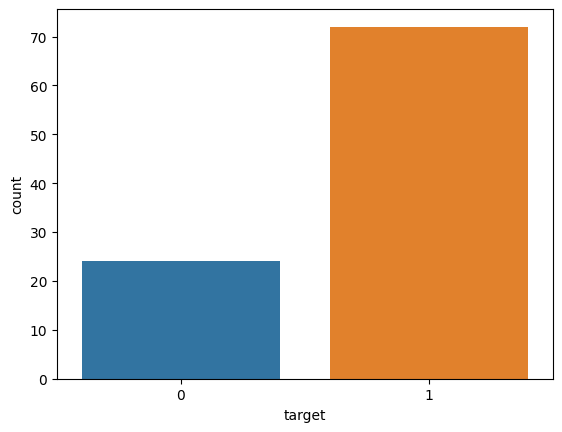

In [42]:
sns.countplot(data=data_female, x='target')

<Axes: xlabel='target', ylabel='count'>

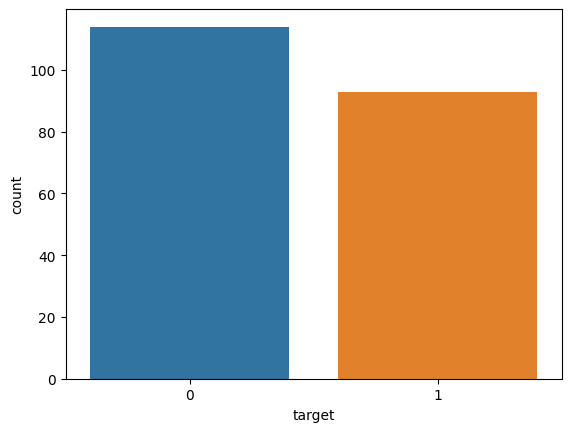

In [46]:
sns.countplot(data=data_male, x='target')

<Axes: xlabel='age', ylabel='fbs'>

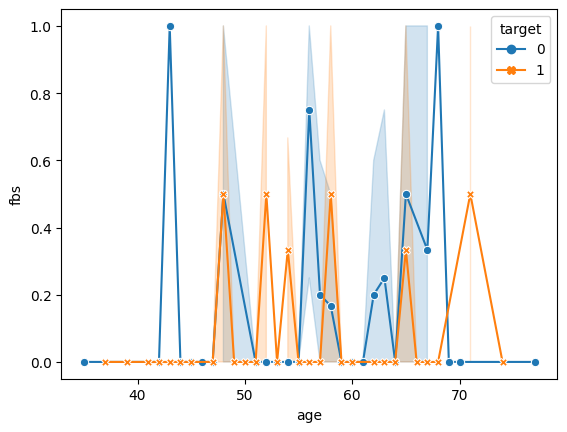

In [60]:
sns.lineplot(data=data[data['chol']>=250], x='age', y='fbs',
             hue="target", style="target",
             markers=True, dashes=False)

<AxesSubplot:xlabel='sex', ylabel='count'>

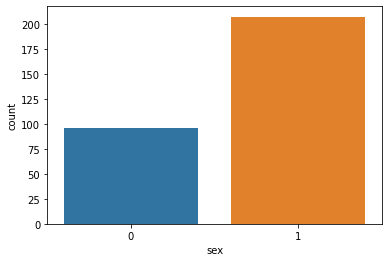

In [ ]:
sns.countplot(data=data, x='sex')

<AxesSubplot:>

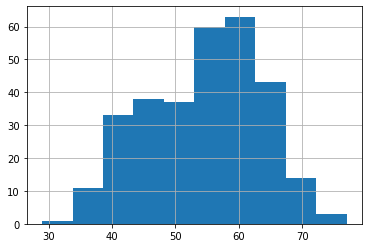

In [ ]:
data['age'].hist()

In [69]:
X = data.iloc[:, :-1].values # make feature from dataframe
y = data.iloc[:, -1].values # make target of dataframe

In [68]:
X1=data.iloc[0:100, :]
X1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
X2=data.iloc[0:100, :-1]

In [67]:
X2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
np.shape(X)

(303, 13)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=380)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65        33
           1       0.74      0.65      0.69        43

    accuracy                           0.67        76
   macro avg       0.67      0.67      0.67        76
weighted avg       0.68      0.67      0.67        76



In [ ]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66        33
           1       0.73      0.77      0.75        43

    accuracy                           0.71        76
   macro avg       0.71      0.70      0.70        76
weighted avg       0.71      0.71      0.71        76



In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(C=15, kernel='linear', random_state=3244)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.87      0.93      0.90        43

    accuracy                           0.88        76
   macro avg       0.88      0.87      0.88        76
weighted avg       0.88      0.88      0.88        76



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
    'C': [0, 1, 10, 0.5],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['auto', 0.1]
}
gsh = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=2, n_jobs=-1, verbose=10)

In [ ]:
gsh.fit(X, y)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.82827205 0.54454949 0.54454949 0.82827205 0.54454949 0.54454949
 0.81840362 0.54786075 0.54454949 0.81840362 0.54454949 0.54454949
 0.84151708 0.54454949 0.54454949 0.84151708 0.54454949 0.54454949]
  warnings.warn(


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0, 1, 10, 0.5], 'gamma': ['auto', 0.1],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=10)

In [ ]:
gsh.best_score_

0.8415170791216451

In [ ]:
gsh.best_estimator_

SVC(C=0.5, gamma='auto', kernel='linear')

In [ ]:
gsh.best_params_

{'C': 0.5, 'gamma': 'auto', 'kernel': 'linear'}

In [ ]:
refit=True
gsh.refit
gsh.predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [ ]:
gsh.best_params_

{'C': 0.5, 'gamma': 'auto', 'kernel': 'linear'}

In [ ]:
svc = SVC(C=1, gamma='auto', kernel='linear')
svc.fit(X, y)

SVC(C=1, gamma='auto', kernel='linear')